# Explore alternative plots for a published SAXS data set

Learning goals:
- Familiarize yourself with several python libraries, particularly matplotlib
- Evaluate which plotting choices may best aid you in your graphical storytelling

We will use here a SAXS data set published in Fig. 1b of _X. Wang, et al. In-situ X-ray scattering observation of colloidal epitaxy at the gas-liquid-solid interface. Nat Commun 16, 2687 (2025), https://doi.org/10.1038/s41467-025-58028-6._



## Load python libraries

In [5]:
# load numerical analysis library.
import numpy as np

# load data handling libraries.
import pandas as pd

# load plotting libraries.
import matplotlib
from matplotlib import pyplot as plt
# and optionally, set here also as a default that legends do not have a frame and no face color.
matplotlib.rcParams['legend.frameon'] = False
matplotlib.rcParams['legend.facecolor'] = 'none'

# file handling libraries.
import os
from pathlib import Path

!pip install openpyxl

## Load experimental data

In [6]:
# path to the Excel data file
fpath_data = "./data/Wang_Nat_Commun_2025_16_2687/41467_2025_58028_MOESM3_ESM.xlsx"

In [7]:
# read data from the Excel file
df = pd.read_excel(fpath_data, sheet_name="Figure 1 b", header=[0, 1])

# let's briefly inspect our import (optional)
df

H= 400 μm                    H= 800 μm                    H= 1200 μm  \
     q (nm-1) intensity (arb.u.)  q (nm-1) intensity (arb.u.)   q (nm-1)   
0    0.036834       1.964347e+09  0.036834       1.717497e+09   0.036834   
1    0.037453       1.857820e+09  0.037453       1.625682e+09   0.037453   
2    0.038072       1.746124e+09  0.038072       1.531093e+09   0.038072   
3    0.038691       1.640243e+09  0.038691       1.439624e+09   0.038691   
4    0.039310       1.541572e+09  0.039310       1.351892e+09   0.039310   
..        ...                ...       ...                ...        ...   
936  0.616271       7.104328e+06  0.616271       6.836470e+06   0.616271   
937  0.616891       7.290547e+06  0.616891       6.813652e+06   0.616891   
938  0.617510       7.498832e+06  0.617510       7.079324e+06   0.617510   
939  0.618129       7.337468e+06  0.618129       6.936909e+06   0.618129   
940  0.618748       7.246492e+06  0.618748       6.918231e+06   0.618748   

                       H= 1600 μm                    H= 2000 μm  \
    intensity (arb.u.)   q (nm-1) intensity (arb.u.)   q (nm-1)   
0         1.547598e+09   0.036834       1.263759e+09   0.036834   
1         1.460874e+09   0.037453       1.194230e+09   0.037453   
2         1.379933e+09   0.038072       1.128474e+09   0.038072   
3         1.298981e+09   0.038691       1.064134e+09   0.038691   
4         1.222054e+09   0.039310       9.995295e+08   0.039310   
..                 ...        ...                ...        ...   
936       6.520273e+06   0.616271       6.087727e+06   0.616271   
937       6.555977e+06   0.616891       6.051476e+06   0.616891   
938       6.690990e+06   0.617510       6.126749e+06   0.617510   
939       6.655905e+06   0.618129       6.220365e+06   0.618129   
940       6.742522e+06   0.618748       6.271020e+06   0.618748   

                        ... H= 5000 μm                    H= 5200 μm  \
    intensity (arb.u.)  ...   q (nm-1) intensity (arb.u.)   q (nm-1)   
0         9.497677e+08  ...   0.036834       3.187424e+09   0.036834   
1         8.984557e+08  ...   0.037453       3.081717e+09   0.037453   
2         8.475814e+08  ...   0.038072       2.977474e+09   0.038072   
3         7.981013e+08  ...   0.038691       2.883202e+09   0.038691   
4         7.504593e+08  ...   0.039310       2.800976e+09   0.039310   
..                 ...  ...        ...                ...        ...   
936       5.666902e+06  ...   0.616271       4.986515e+06   0.616271   
937       5.677948e+06  ...   0.616891       5.011594e+06   0.616891   
938       5.719507e+06  ...   0.617510       5.065044e+06   0.617510   
939       5.682244e+06  ...   0.618129       5.091372e+06   0.618129   
940       5.760346e+06  ...   0.618748       5.092043e+06   0.618748   

                       H= 5400 μm                    H= 5600 μm  \
    intensity (arb.u.)   q (nm-1) intensity (arb.u.)   q (nm-1)   
0         3.197068e+09   0.036834       3.112691e+09   0.036834   
1         3.083905e+09   0.037453       3.012355e+09   0.037453   
2         2.978713e+09   0.038072       2.911815e+09   0.038072   
3         2.887433e+09   0.038691       2.821191e+09   0.038691   
4         2.801191e+09   0.039310       2.737009e+09   0.039310   
..                 ...        ...                ...        ...   
936       5.122290e+06   0.616271       5.181290e+06   0.616271   
937       5.099224e+06   0.616891       5.198733e+06   0.616891   
938       5.137631e+06   0.617510       5.303805e+06   0.617510   
939       5.141098e+06   0.618129       5.319420e+06   0.618129   
940       5.204366e+06   0.618748       5.256706e+06   0.618748   

                       H= 5800 μm                     
    intensity (arb.u.)   q (nm-1) intensity (arb.u.)  
0         3.175173e+09   0.036834       3.170382e+09  
1         3.066311e+09   0.037453       3.068420e+09  
2         2.962186e+09   0.038072       2.964885e+09  
3         2.876919e+09   0.038691       2.869174e+09  
4   

In [8]:
# Extract the x data
x_data_columns = df.columns[0::2]          # x data is in every second column, starting from the first one
x_data = df[x_data_columns].to_numpy()     # convert to numpy array
if np.all(x_data == x_data[:, 0, None]):   # check if all columns in x_data are equal
    x_data = x_data[:, 0]                   # use the first column as x data
else:
    raise ValueError("Not all x_data columns are equal. Please check the data and/or adapt the plotting here below.")    # raise an error if not

# Extract the y data
y_data_columns = df.columns[1::2]           # y data is in every second column, starting from the second one
y_data = df[y_data_columns].to_numpy()      # convert to numpy array

# Extract the z data from the df header
z_data_header = df.columns[0::2].get_level_values(0).to_numpy()     # z data is in the first row of the header, which is a MultiIndex
z_data = np.array([float(z_data_header[i].split("= ")[1].split(" ")[0]) for i in range(len(z_data_header))])       # get only the numerical data

In [9]:
# Get the x and y axis labels
x_label = df.columns[0][1]  # second header row of the first column
y_label = df.columns[1][1]  # second header row of the second column

# Get the z axis label
z_type = df.columns[0][0].split("=")[0]  # here we grab the type of the z data from the first header row
z_unit = df.columns[0][0].split("=")[1].split(" ")[-1]  # here we grab the units from the first header row
z_label_legend = "{} ({})".format(df.columns[0][0].split("=")[0], z_unit)  # the z label (to be displayed in, e.g., the legend)
z_label_traces = [z_data[_] for _ in range(len(z_data))] # the z label for the traces (containing only the numerical data)

## Plot

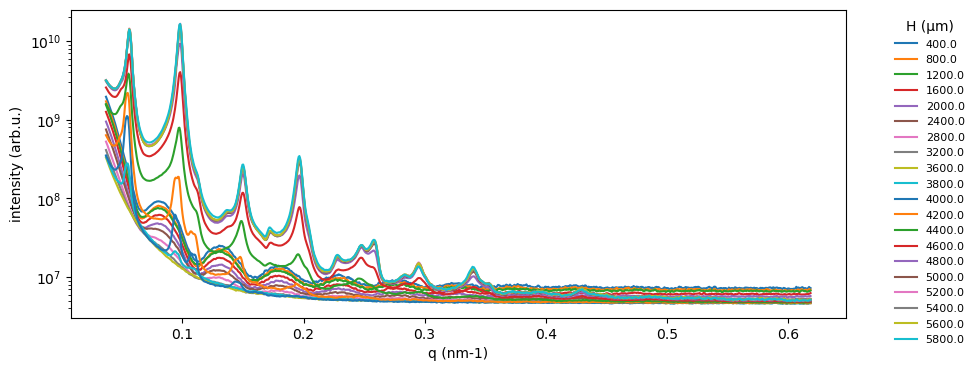

In [10]:
# Create the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

# Plot the data
for i in range(y_data.shape[1]):
    ax.plot(x_data, y_data[:, i], label=z_label_traces[i])

# Apply some more cosmetics
ax.set_yscale("log")  # Set y-axis to logarithmic scale
ax.set_xlabel(x_label)  # Set x-axis label
ax.set_ylabel(y_label)  # Set y-axis label
ax.legend(title=z_label_legend, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)     # Add a legend outside the plot

# Save the figure
fig.savefig("figure_B_SAXS_1D.png", dpi=300, bbox_inches="tight")

# Exercises

<div class="alert alert-block alert-info">
Let's get to work with some hands-on learning!
</div>

> In a first set of exercises (1.1-1.2), we will keep the current plot type (the above displayed collection of line traces), but try to improve it by
>- making it more appealing and inclusive - thinking of a colorblind audience and potential black-and-white printing
>- highlight the interesting part of the data

> In a second set of exercises (2.1-2.3), we explore pro's and con's of other plot types for our aim to transmit the message, including
>- 2D plots (aka "heatmaps")
>- other 1D plots
>- animated 1D plots

<div class="alert alert-block alert-info">
<b>Tip:</b> You can find some possible solutions in the `/solutions` directory.
</div>

## Exercise 1.1

Increase the readability of your plot for a broader audience, including:
-  a color-blind person
-  someone only having access to a hardcopy printed in grayscale

_Hint: one option would be to make use matplotlib's perceptually uniform sequential colormaps_


In [11]:
# Add your solution here ...

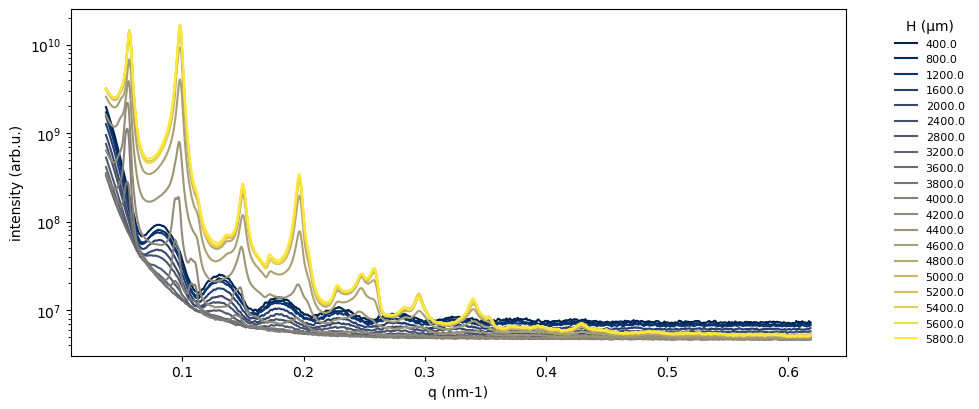

In [25]:
# Create the figure and axis
figsize = (10, 4.5)     # set the figure size, e.g., (3, 8) for a vertically extended plot or (8, 3) for a horizontally extended plot
fig, ax = plt.subplots(1, 1, figsize=figsize)

# Choose a color scheme for the traces
# Plot using trace colors taken from a colormap. Here are some possible choices:
# - for perceptually uniform sequential colormaps:      "viridis", "plasma", "inferno", "magma", "cividis"
# - for diverging colormaps:                            "coolwarm", "bwr", "seismic", "berlin", "managua", "PiYG", "PRGn", "BrBG", "PuOr", and many more
# - for colormaps alluding to the visible spectrum:     "Spectral", "rainbow", "jet", "turbo", and several more
cmap = plt.get_cmap("cividis")                      # choose a colormap. "Cividis" is a good choice for colorblind-friendly plots and also works well in black and white prints.
colors = cmap(np.linspace(0, 1, y_data.shape[1]))   # generate colors for each trace in y_data
# if some of the colors appear unsuitable for a trace color (e.g., too light on a white background), you can manually adjust the color range, e.g.:
# colors = cmap(np.linspace(0, 0.9, y_data.shape[1]))  # this would only use the first 90% of the range of the colormap

# NOTE: Instead of using a suitable matplotlib colormap, an alternative solution would be to adapt the matplotlib plotting style
# matplotlib.style.use("seaborn-v0_8-colorblind")      # you can see the available styles by running `plt.style.available`. Some colorblind-friendly styles are "seaborn-v0_8-colorblind" or "tableau-colorblind10". # matplotlib.style.use("default") would reset it to the default style

# Plot the data
for i in range(y_data.shape[1]):
    ax.plot(x_data, y_data[:, i], label=z_label_traces[i], color=colors[i])

# Apply some more cosmetics
ax.set_yscale("log")  # Set y-axis to logarithmic scale
ax.set_xlabel(x_label)  # Set x-axis label
ax.set_ylabel(y_label)  # Set y-axis label
ax.legend(title=z_label_legend, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)     # Add a legend outside the plot

# Save the figure
fig.savefig("figure_B_SAXS_1D_inclusive.png", dpi=300, bbox_inches="tight")

## Exercise 1.2

Imagine you have identified some interesting features in the spectrum. Now you want to ensure a reader of your publication sees them as well. Adapt the above plot by
-  zooming into the q-range of interest

Likely, to better reveal the feature you want to emphasize, you also want to further adapt
-  the displayed intensity range
-  the figure size and/or aspect ratio

_Hint: you could potentially look at the q-range from 0.21 to 0.31 $nm^{-1}$, but the choice is entirely up to you. Maybe you find a more interesting region still?_

In [26]:
# Add your solution here ...

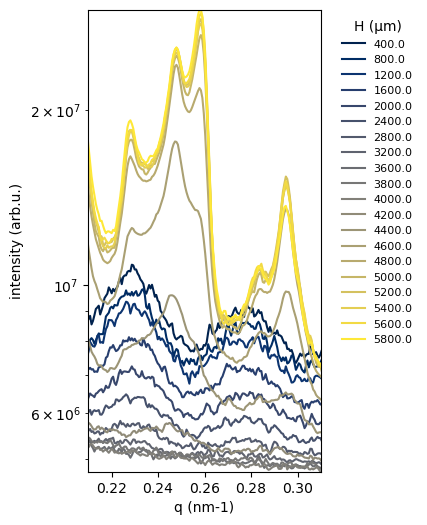

In [28]:
# Create the figure and axis
figsize = (3, 6)     # set the figure size, e.g., (3, 6) for a vertically extended plot or (6, 3) for a horizontally extended plot
fig, ax = plt.subplots(1, 1, figsize=figsize)

# Choose a color scheme for the traces
# Plot using trace colors taken from a colormap.
cmap = plt.get_cmap("cividis")                      # we keep the "cividis" colormap as a perceptually uniform sequential colormaps
colors = cmap(np.linspace(0, 1, y_data.shape[1]))   # generate colors for each trace in y_data

# Plot the data
for i in range(y_data.shape[1]):
    ax.plot(x_data, y_data[:, i], label=z_label_traces[i], color=colors[i])

# Apply some cosmetics
ax.set_yscale("log")  # Set y-axis to logarithmic scale
ax.set_xlabel(x_label)  # Set x-axis label
ax.set_ylabel(y_label)  # Set y-axis label
ax.legend(title=z_label_legend, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)     # Add a legend outside the plot

# Zoom in onto a smaller q-range
xlim = (0.21, 0.31)  # Define the x-limits to zoom in on a specific range
ax.set_xlim(xlim)  # Set x-limits

# Now also adjust the intensity range (y-axis limits) based on the visible data in the new x-range
mask = (x_data >= min(xlim)) & (x_data <= max(xlim))    # Get the mask for x_data within the new x-limits
y_visible = y_data[mask]                # Find the min and max y values in the displayed x-range 
y_visible = y_visible[y_visible > 0]    # exclude zeros or negative values for log scale
if y_visible.size > 0:                  # Set new y-axis limits based on the visible data
    ax.set_ylim(y_visible.min(), y_visible.max())
else:
    raise ValueError("No positive data in the specified q-range. Please check the data and/or adapt the x-limits.")

# Save the figure
fig.savefig("figure_B_SAXS_1D_xzoom.png", dpi=300, bbox_inches="tight")

## Exercise 2.1

The current graph is too busy, with the 20 individual traces often overlapping each other. Let's make each individual trace more appreciable by exploring other 1D data types, such as:<br>
- vertically stacked traces
- perspective view

_Extra task: note down to pro's and con's of each plotting type. Think not only of the aesthetics, but also about the information content ..._

In [29]:
# Add your solution here ...

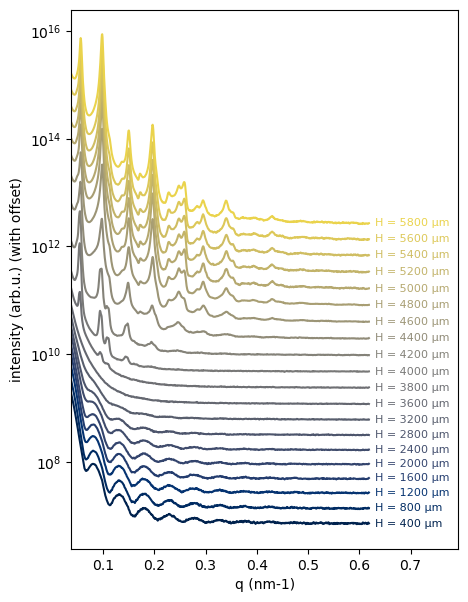

In [32]:
# Vertically offset each trace for better visibility (stacked plot)
figsize = (5, 7)
fig, ax = plt.subplots(1, 1, figsize=figsize)

# Choose a color scheme for the traces
cmap = plt.get_cmap("cividis")
colors = cmap(np.linspace(0, 0.92, y_data.shape[1]))

offset = 2  # multiplicative offset factor between traces
for i in range(y_data.shape[1]):
    y_offset = y_data[:, i] * (offset ** i)
    ax.plot(
        x_data,
        y_offset,
        color=colors[i]
    )
    # Add label as a textbox to the right of each trace
    ax.text(
        x_data[-1] + 0.02 * (x_data[-1] - x_data[0]),  # more space to the right
        y_offset[-1],
        f"H = {z_label_traces[i]:.0f} μm",
        va='center',
        ha='left',
        fontsize=8,
        color=colors[i],
        bbox=dict(facecolor='none', edgecolor='none', alpha=0.7, pad=0.5)
    )

# Apply some more cosmetics
ax.set_yscale("log")
ax.set_xlabel(x_label)
ax.set_ylabel(y_label + " (with offset)")
x_margin = 0.3 * (x_data[-1] - x_data[0])       # account 30% of the plot area for the text boxes
ax.set_xlim(x_data[0], x_data[-1] + x_margin)   # add a margin to the right side

# Save the figure
fig.savefig("figure_B_SAXS_1D_ystacked.png", dpi=300, bbox_inches="tight")


In [33]:
# For 3D plots with a perspective, you can use the following code snippet.
# fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="3d"))

# ...

## Exercise 2.2

Let's make visually a stronger connection of the SAXS data to the sample. <br>
The sample is divided into 2 distinct parts:<br>
- below 3800 $\mu m$: liquid
- above 3800 $\mu m$: solid

Think of graphical means to visualize this in the plotted SAXS data

_Hint: think of grouping the data by the choice of the color, or using a 2D plot type (heatmap) instead ..._

In [34]:
# Add your solution here ...

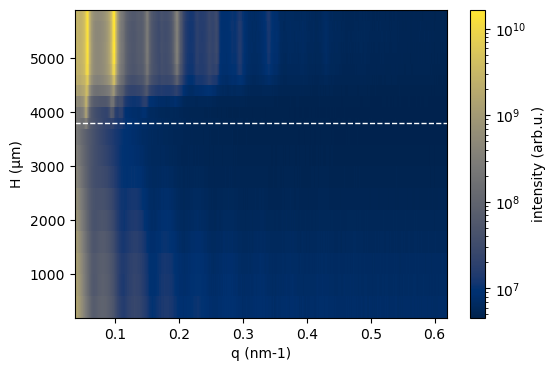

In [35]:
# Plot this data set as a 2D heatmap

# Create a new figure and axis for the heatmap
figsize = (6, 4)     # set the figure size, e.g., (3, 8) for a vertically extended plot or (8, 3) for a horizontally extended plot
fig_heatmap, ax_heatmap = plt.subplots(1, 1, figsize=figsize)                     

# Create a 2D heatmap, using a logarithmic color scale
cax = ax_heatmap.pcolormesh(x_data, z_data, y_data.T, shading='auto', cmap=cmap, norm=matplotlib.colors.LogNorm())  # transpose y_data for correct orientation

# Add a colorbar to the heatmap
cbar = fig_heatmap.colorbar(cax, ax=ax_heatmap)
cbar.set_label(y_label)  # Set the colorbar label 

# Add a white horizontal line at H = 3600 mum, to indicate the transition from the liquid to the solid state
h_transition = 3800  # height in mum
ax_heatmap.axhline(h_transition, color='white', linestyle='--', linewidth=1, label=r'transition at H = {} $\mu m$'.format(h_transition))  # add a horizontal line

# Set the axis labels
ax_heatmap.set_xlabel(x_label)  # Set x-axis label
ax_heatmap.set_ylabel(z_label_legend)  # Set y-axis label

# # Zoom in on the q-range between 0.08 and 0.13
# ax_heatmap.set_xlim(0.08, 0.13)  # Set x-axis limits
# # update the y-axis limits to match the displayed z_data range in this zoomed-in view

# Save the heatmap figure
fig_heatmap.savefig("figure_B_SAXS_2D_heatmap.png", dpi=300, bbox_inches="tight")  # save the heatmap figure

## Exercise 2.3

Let's assume it would make sense to create an animated version of this height-dependent SAXS data set (e.g., for use in a presentation).<br>

Your task: create a GIF file which cycles through the 20 SAXS spectra. Each frame in the GIF should display:<br>
- the current SAXS spectrum
- the associated height in $\mu m$ as a title above the plot

_Hint: one out of several options would be to utilize matplotlib's animation library. You can import it by ..._

In [36]:
# Add your solution here ...

In [42]:
# One option is to create an animation using matplotlib's FuncAnimation.
from matplotlib import animation

# Create a figure and axis for the animation with higher resolution
fig_anim, ax_anim = plt.subplots(figsize=(8, 4))  # larger figure size

(line,) = ax_anim.plot([], [], lw=2)
title = ax_anim.text(0.5, 1.05, '', transform=ax_anim.transAxes, ha='center', fontsize=12)

ax_anim.set_xlabel(x_label)
ax_anim.set_ylabel(y_label)
ax_anim.set_yscale('log')
ax_anim.set_xlim(x_data.min(), x_data.max())
ax_anim.set_ylim(y_data[y_data > 0].min(), y_data.max())

def init():
    line.set_data([], [])
    title.set_text('')
    return line, title

def animate(idx):
    y = y_data[:, idx]
    line.set_data(x_data, y)
    line.set_color(colors[idx])
    title.set_text(f'H = {z_label_traces[idx]:.0f} μm')
    return line, title

ani = animation.FuncAnimation(
    fig_anim, animate, init_func=init, frames=y_data.shape[1], interval=500, blit=True      # interval in milliseconds, bli
)

# Save as GIF
ani.save('figure_B_SAXS_1D_animated.gif', writer='pillow', fps=2, dpi=300)      # fps = frames per second, dpi = dots per inch (resolution)
plt.close(fig_anim) 

# # NOTE: If you want to display the animation in a Jupyter Notebook instead of saving it as a GIF,
# comment out the last two lines of code and uncomment the next two lines of code
# from IPython.display import HTML
# HTML(ani.to_jshtml())  # This will display the animation directly in the notebook
    